## Preparing the notebook

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the DF from local machine
df = 'df_orig.csv'
df = pd.read_csv(df, sep=';')

## Exploratory Analysis
Important! The summer period has higher prices, resulting in inaccurate year's price predictions.

       PORTUGUESE             ENGLISH
       'comercial'            office
       'casa'                 house
       'apartamento'          apartment
       'consultorio'          medical office
       'deposito'             deposit
       'cobertura'            penthouse
       'sobrado'              duplex
       'edif_comercial'       office building 
       'kitnet'               studio
       'loft'                 loft
       'lote'                 lot/land

In [3]:
# analisando tamanhos, itens nulos e types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2268 non-null   int64 
 1   product     2268 non-null   object
 2   area        2268 non-null   object
 3   room        2268 non-null   object
 4   bath        2268 non-null   object
 5   garage      2268 non-null   object
 6   adress      2268 non-null   object
 7   price       2268 non-null   object
dtypes: int64(1), object(7)
memory usage: 141.9+ KB


In [4]:
# confirmando estrutura do DF
df.head()

,Unnamed: 0,product,area,room,bath,garage,adress,price
0,0,"Sala/Conjunto para Aluguel, 30m²",30 m²,-- Quarto,1 Banheiro,1 Vaga,"Rua Joe Collaço, 341 - Córrego Grande, Florian...",R$ 1.400 /mês
1,1,"Casa com 3 Quartos para Aluguel, 230m²",30,3 Quartos,4 Banheiros,1 Vaga,"Rua João Henrique Gonçalves, 313 - Canto dos A...",R$ 16.000 /mês
2,2,"Ponto comercial/Loja/Box para Aluguel, 80m²",230 m²,-- Quarto,1 Banheiro,-- Vaga,"Rua Deputado Paulo Preis, 78 - Jurerê, Florian...",R$ 6.950 /mês
3,3,"Apartamento com 3 Quartos para Aluguel, 300m²",230,3 Quartos,5 Banheiros,2 Vagas,"Avenida Governador Irineu Bornhausen, 3690 - B...",R$ 9.950 /mês
4,4,"Consultório para Aluguel, 350m²",80 m²,-- Quarto,5 Banheiros,1 Vaga,"Rua Frei Caneca, 490 - Agronômica, Florianópol...",R$ 100 /mês


In [5]:
# Analisando existência de duplicados
df.duplicated().sum()

108

In [6]:
# Identificando os itens duplicados
df[df.duplicated()].groupby(['product']).count()

,Unnamed: 0,area,room,bath,garage,adress,price
product,,,,,,,
"Apartamento com 2 Quartos para Aluguel, 101m²",2,2,2,2,2,2,2
"Apartamento com 2 Quartos para Aluguel, 62m²",1,1,1,1,1,1,1
"Apartamento com 2 Quartos para Aluguel, 66m²",1,1,1,1,1,1,1
"Apartamento com 2 Quartos para Aluguel, 70m²",4,4,4,4,4,4,4
"Apartamento com 2 Quartos para Aluguel, 71m²",2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
"Sala/Conjunto para Aluguel, 69m²",2,2,2,2,2,2,2
"Sala/Conjunto para Aluguel, 78m²",2,2,2,2,2,2,2
"Sala/Conjunto para Aluguel, 87m²",2,2,2,2,2,2,2


In [7]:
# Acessando primeiro item da series
_ = df[df.duplicated()].groupby(['product']).count().index.values
_[0]

'Apartamento com 2 Quartos para Aluguel, 101m²'

In [8]:
# Confirmando itens duplicados
df[df.duplicated()][df['product'] == _[0]]

<ipython-input-8-6ec1759d5486>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.duplicated()][df['product'] == _[0]]


,Unnamed: 0,product,area,room,bath,garage,adress,price
860,32,"Apartamento com 2 Quartos para Aluguel, 101m²",32 m²,2 Quartos,2 Banheiros,1 Vaga,"Avenida Engenheiro Max de Souza, 1370 - Coquei...",R$ 1.450 /mês
896,32,"Apartamento com 2 Quartos para Aluguel, 101m²",32 m²,2 Quartos,2 Banheiros,1 Vaga,"Avenida Engenheiro Max de Souza, 1370 - Coquei...",R$ 1.450 /mês


In [9]:
# Confirmando exclusão
total_df = len(df)
total_dupl = df.duplicated().sum()
total_exp = total_df - total_dupl
df = df.drop_duplicates()
total_new = len(df)

print(f'Total de itens do DF = {total_df}')
print(f'Itens duplicados = {total_dupl}')
print(f'Total de itens esparados após exclusão = {total_exp}')
print(f'Total de itens após exclusão = {total_new}')

Total de itens do DF = 2268
Itens duplicados = 108
Total de itens esparados após exclusão = 2160
Total de itens após exclusão = 2160


### Data transformations
* Transform all data to lowercase
* Product - get only the first information
* Area_extract - get the area in the product title to compare with the column area
* Area -  get only numbers & transform in int
* Room - get only numbers & transform in int
* Bath - get only numbers & transform in int
* garage - get only numbers & transform in int' & insert zero at '--'
* adress - get only the district information (second)
* price - get only numbers & transform in int & made prices montly rent 

In [10]:
df.head()

,Unnamed: 0,product,area,room,bath,garage,adress,price
0,0,"Sala/Conjunto para Aluguel, 30m²",30 m²,-- Quarto,1 Banheiro,1 Vaga,"Rua Joe Collaço, 341 - Córrego Grande, Florian...",R$ 1.400 /mês
1,1,"Casa com 3 Quartos para Aluguel, 230m²",30,3 Quartos,4 Banheiros,1 Vaga,"Rua João Henrique Gonçalves, 313 - Canto dos A...",R$ 16.000 /mês
2,2,"Ponto comercial/Loja/Box para Aluguel, 80m²",230 m²,-- Quarto,1 Banheiro,-- Vaga,"Rua Deputado Paulo Preis, 78 - Jurerê, Florian...",R$ 6.950 /mês
3,3,"Apartamento com 3 Quartos para Aluguel, 300m²",230,3 Quartos,5 Banheiros,2 Vagas,"Avenida Governador Irineu Bornhausen, 3690 - B...",R$ 9.950 /mês
4,4,"Consultório para Aluguel, 350m²",80 m²,-- Quarto,5 Banheiros,1 Vaga,"Rua Frei Caneca, 490 - Agronômica, Florianópol...",R$ 100 /mês


In [11]:
# Extracting area from product column
df['ext_area'] = [n.split(' ')[-1][:-2].strip() for n in df['product']]

In [12]:
# Replacing inconsistent ext_area data for area data
df['ext_area'].replace('Alugu', 94, inplace=True)

In [13]:
# Lowercase & split data
df['product'] = [n.split(' ')[0].lower() for n in df['product']]

In [14]:
# Lowercase & split data
df['area'] = [int(n.split()[0]) for n in df['area']]

In [15]:
# Transforming STR at INT
df['ext_area'] = df['ext_area'].astype('int64')

In [16]:
# Replacing -- for zero & split data
df['room'] = [int(n.strip().replace('--', '0')[0]) for n in df['room']]

In [17]:
# Replacing -- for zero & split data
df['bath']= [int(n.strip().replace('-', '0')[0]) for n in df['bath']]

In [18]:
# Replacing -- for zero & split data
df['garage'] = [int(n.strip().replace('-', '0')[0]) for n in df['garage']]

In [19]:
# Lowercase & split data
df['adress'] = [(n.split('-')[-2]).split(',')[-2].strip().lower() for n in df['adress']]

In [20]:
# Split data & replacing . for space
df['period'] = [n.split('/')[1][:3].strip() for n in df['price']]
df['price'] = [int(n.split(' ')[1].replace('.', '').strip()) for n in df['price']]

In [21]:
# Removing special characters
df['product'] = df['product'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['adress'] = df['adress'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [22]:
# Checking the products
df['product'].unique()

array(['sala/conjunto', 'casa', 'ponto', 'apartamento', 'consultorio',
       'galpao/deposito/armazem', 'cobertura', 'sobrado', 'imovel',
       'predio/edificio', 'kitnet/conjugado', 'loft', 'lote/terreno'],
      dtype=object)

In [23]:
# Grouping the products 
df = df.replace('sala/conjunto', 'comercial').replace('ponto', 'comercial')
df = df.replace('imovel', 'comercial').replace('predio/edificio', 'edif_comercial')
df = df.replace('galpao/deposito/armazem', 'deposito').replace('kitnet/conjugado', 'kitnet')
df = df.replace('lote/terreno', 'lote')

In [24]:
# Checking the groups
df['product'].unique()

array(['comercial', 'casa', 'apartamento', 'consultorio', 'deposito',
       'cobertura', 'sobrado', 'edif_comercial', 'kitnet', 'loft', 'lote'],
      dtype=object)

In [25]:
# Delete column and Unnamed:0 (useless)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
df.head()

,product,area,room,bath,garage,adress,price,ext_area,period
0,comercial,30,0,1,1,corrego grande,1400,30,mês
1,casa,30,3,4,1,canto dos aracas,16000,230,mês
2,comercial,230,0,1,0,jurere,6950,80,mês
3,apartamento,230,3,5,2,beira mar,9950,300,mês
4,consultorio,80,0,5,1,agronomica,100,350,mês


### Inconsistents values in price column

* Transformation from daily to montly rent

In [27]:
# Selecting period data equal 'dia'
day_value = df[df['period']=='dia']
print(f'O total de valores diários é {len(day_value)}')

O total de valores diários é 411


In [28]:
# checking the correct filter
len(df.loc[df.period == 'dia','price'])

411

In [29]:
# transforming values montly (*30days)
df.loc[df.period == 'dia','price'] = df.loc[df.period == 'dia','price'] * 30

In [30]:
# Deleting period columns
df.drop(columns=['period'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2267
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   product   2160 non-null   object
 1   area      2160 non-null   int64 
 2   room      2160 non-null   int64 
 3   bath      2160 non-null   int64 
 4   garage    2160 non-null   int64 
 5   adress    2160 non-null   object
 6   price     2160 non-null   int64 
 7   ext_area  2160 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 151.9+ KB


### Grouping products (residential and commercial)

* District 'barreiros' and 'campinas' don't found at Florianópolis - deleted 04 items at total

In [31]:
# Creating a new column
df['property'] = df['product']

In [32]:
# Defining the groups variables
res = ['apartamento', 'cobertura', 'kitnet', 'loft', 'casa', 'sobrado']
com = ['comercial', 'consultorio', 'deposito', 'edif_comercial']
deleted = ['lote']

In [33]:
# Creating the groups
df['property'] = [n.replace(n, 'residential') if n in res else n for n in df['property']]
df['property'] = [n.replace(n, 'commercial') if n in com else n for n in df['property']]

In [34]:
# Excluded lot/land informations
print(f'Current DF size is {len(df)} rows')

_ = df[df['property'].isin(deleted)]                          
print(f'Total number of lot/land is {len(_)} rows')
      
df = df[~df['property'].isin(deleted)]
print(f'The DF size is now {len(df)} items')

Current DF size is 2160 rows
Total number of lot/land is 9 rows
The DF size is now 2151 items


### Grouping districts into zones (N, S, W, E)

* District 'barreiros' and 'campinas' don't found at Florianópolis - deleted 04 items at total

In [35]:
# Checking the columns
df['adress'].unique()

array(['corrego grande', 'canto dos aracas', 'jurere', 'beira mar',
       'agronomica', 'campeche', 'centro', 'trindade', 'joao paulo',
       'saco grande', 'itacorubi', 'estreito', 'canasvieiras', 'daniela',
       'jardim atlantico', 'capoeiras', 'carvoeira', 'saco dos limoes',
       'rio tavares', 'ingleses do rio vermelho', 'pantanal',
       'jurere internacional', 'ingleses norte', 'cachoeira do bom jesus',
       'ribeirao da ilha', 'santo antonio de lisboa', 'bom abrigo',
       'lagoa da conceicao', 'coqueiros', 'lagoinha do norte',
       'morro das pedras', 'ponta das canas', 'pantano do sul',
       'santa monica', 'barra da lagoa', 'parque sao jorge', 'canto',
       'monte verde', 'balneario', 'sao joao do rio vermelho',
       'costeira do pirajubae', 'praia dos ingleses', 'cacupe',
       'canto da lagoa', 'abraao', 'praia brava', 'monte cristo',
       'barreiros', 'vargem grande', 'vargem pequena', 'praia mole',
       'itaguacu', 'canajure', 'carianos', 'sambaqui'

In [36]:
# Defining zones and adding the districts
north = ['cacupe', 'santo antonio de lisboa','sambaqui', 'daniela',
         'jurere internacional', 'jurere',  'canasvieiras', 'ponta das canas', 
         'ingleses do rio vermelho', 'lagoinha do norte', 'praia brava', 'ratones', 
         'vargem pequena', 'cachoeira do bom jesus', 'vargem grande', 
         'sao joao do rio vermelho', 'ingleses norte', 'praia dos ingleses', 'vagem do bom jesus',
         'praia do forte', 'canajure']

east = ['costa da lagoa', 'barra da lagoa', 'lagoa da conceicao', 'praia mole', 'canto dos aracas', 'canto da lagoa']

midtown = ['corrego grande', 'beira mar', 'agronomica', 'pantanal', 'centro', 'trindade', 
          'joao paulo', 'saco grande', 'itacorubi', 'pantanal', 'santa monica', 'parque sao jorge',
         'monte verde', 'jose mendes', 'centro']

south = ['campeche', 'saco dos limoes', 'rio tavares', 'ribeirao da ilha', 'morro das pedras', 
       'pantano do sul',  'costeira do pirajubae', 'armacao', 'carianos', 'tapera']

continental = [ 'estreito', 'jardim atlantico', 'capoeiras', 'carvoeira', 'bom abrigo',
               'coqueiros', 'canto', 'balneario', 'abraao', 'monte cristo', 'itaguacu',
               'canajure', 'carianos', 'coloninha', 'balneario do estreito', 'itaguacu']      

deleted = ['barreiros', 'campinas'] #It's not at Florianópolis

In [37]:
# Excluded district not in Florianópolis
print(f'Current DF size: {len(df)}')
_ = df[df['adress'].isin(deleted)]
print(f'Total number of inconsistent districts: {len(_)}')
df = df[~df['adress'].isin(deleted)]
print(f'DF size after inconsistent data exclusion: {len(df)}')

Current DF size: 2151
Total number of inconsistent districts: 4
DF size after inconsistent data exclusion: 2147


In [38]:
# Defining groups and analysing the imbalace between zones
n = df[df['adress'].isin(north)]
e = df[df['adress'].isin(east)]
m = df[df['adress'].isin(midtown)]
s = df[df['adress'].isin(south)]
cnt = df[df['adress'].isin(continental)]

print(f'North: {len(n)} \nEast: {len(e)} \nMidtown: {len(m)} \nSouth: {len(s)} \nContinental: {len(cnt)}')

North: 567 
East: 47 
Midtown: 1022 
South: 118 
Continental: 397


In [39]:
print(f'North: \n{n.describe()} \n \nEast: \n{e.describe()} \n \nMidtown: \n{m.describe()} \n \nSouth: \n{s.describe()} \n \nContinental: \n{cnt.describe()}')

North: 
              area        room        bath      garage          price  \
count   567.000000  567.000000  567.000000  567.000000     567.000000   
mean    185.624339    2.774250    2.776014    1.834215   36991.075838   
std     309.804655    1.778903    1.944710    1.562828   58483.170950   
min       3.000000    0.000000    0.000000    0.000000    1013.000000   
25%      55.500000    2.000000    1.000000    1.000000    9250.000000   
50%      86.000000    2.000000    2.000000    1.000000   17800.000000   
75%     167.000000    4.000000    4.000000    2.000000   39000.000000   
max    3400.000000    9.000000    9.000000    9.000000  600000.000000   

          ext_area  
count   567.000000  
mean    202.970018  
std     232.339509  
min      10.000000  
25%      70.000000  
50%     100.000000  
75%     268.000000  
max    1300.000000   
 
East: 
              area       room       bath     garage          price  \
count    47.000000  47.000000  47.000000  47.000000      47.00000

In [40]:
# Creating new column
df['zone'] = df['adress']

In [41]:
# Creating the zones
df['zone'] = [n.replace(n, 'north') if n in north else n for n in df['zone']]
df['zone'] = [n.replace(n, 'east') if n in east else n for n in df['zone']]
df['zone'] = [n.replace(n, 'midtown') if n in midtown else n for n in df['zone']]
df['zone'] = [n.replace(n, 'south') if n in south else n for n in df['zone']]
df['zone'] = [n.replace(n, 'continental') if n in continental else n for n in df['zone']]

In [42]:
# checking the return
df[df['zone']=='midtown']

,product,area,room,bath,garage,adress,price,ext_area,property,zone
0,comercial,30,0,1,1,corrego grande,1400,30,commercial,midtown
3,apartamento,230,3,5,2,beira mar,9950,300,residential,midtown
4,consultorio,80,0,5,1,agronomica,100,350,commercial,midtown
6,comercial,300,0,1,0,centro,1400,52,commercial,midtown
7,comercial,300,0,2,5,trindade,1770,20,commercial,midtown
...,...,...,...,...,...,...,...,...,...,...
2258,comercial,56,0,0,1,centro,2000,47,commercial,midtown
2259,comercial,56,4,2,0,trindade,4500,150,commercial,midtown
2261,comercial,65,0,1,1,centro,95000,1743,commercial,midtown
2262,comercial,70,0,2,0,centro,6490,120,commercial,midtown


In [43]:
df[df['adress'].isin(midtown)]

,product,area,room,bath,garage,adress,price,ext_area,property,zone
0,comercial,30,0,1,1,corrego grande,1400,30,commercial,midtown
3,apartamento,230,3,5,2,beira mar,9950,300,residential,midtown
4,consultorio,80,0,5,1,agronomica,100,350,commercial,midtown
6,comercial,300,0,1,0,centro,1400,52,commercial,midtown
7,comercial,300,0,2,5,trindade,1770,20,commercial,midtown
...,...,...,...,...,...,...,...,...,...,...
2258,comercial,56,0,0,1,centro,2000,47,commercial,midtown
2259,comercial,56,4,2,0,trindade,4500,150,commercial,midtown
2261,comercial,65,0,1,1,centro,95000,1743,commercial,midtown
2262,comercial,70,0,2,0,centro,6490,120,commercial,midtown


In [44]:
# Deleted old columns
df = df.drop(columns=['product', 'adress'])

### Distribution Analysis
* Ext_area - Numeric and continuous
* Area - Numeric and continuous
* Price - Numeric and continuous

* Room - Categoric
* Bath - Categoric
* Garage - Categoric
* Property - Categoric
* zone - Categoric

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2267
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      2147 non-null   int64 
 1   room      2147 non-null   int64 
 2   bath      2147 non-null   int64 
 3   garage    2147 non-null   int64 
 4   price     2147 non-null   int64 
 5   ext_area  2147 non-null   int64 
 6   property  2147 non-null   object
 7   zone      2147 non-null   object
dtypes: int64(6), object(2)
memory usage: 151.0+ KB


In [46]:
# Defining variables groups
continuous_var = ['ext_area', 'price', 'area']
categorical_var = ['room', 'bath', 'garage', 'zone', 'property']

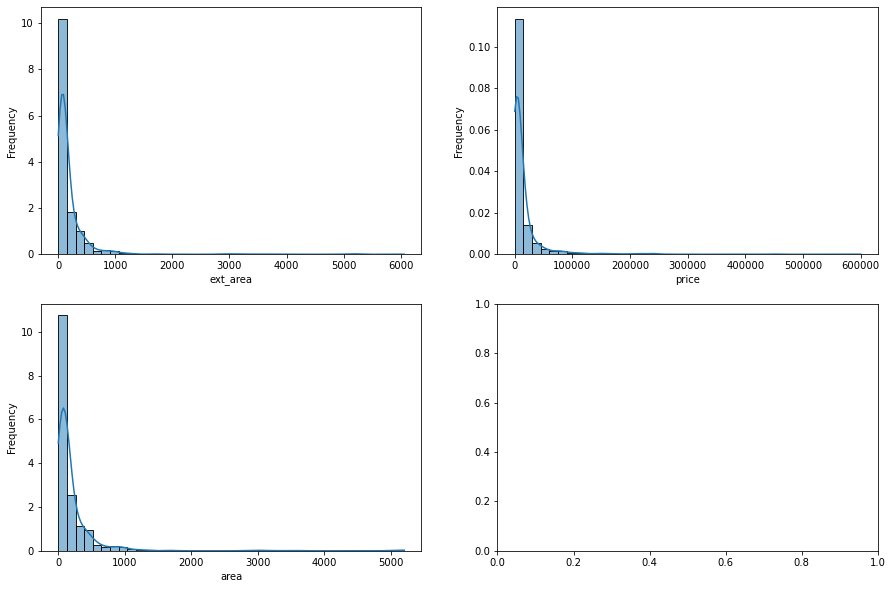

In [47]:
# Distribution of continuous variables 
n_rows=2
n_cols=2
# Subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 10)

for i, column in enumerate(continuous_var):
  sns.histplot(df[column], ax=axes[i//n_cols, i%n_cols], bins=40,  stat="frequency", kde=True)

plt.show()

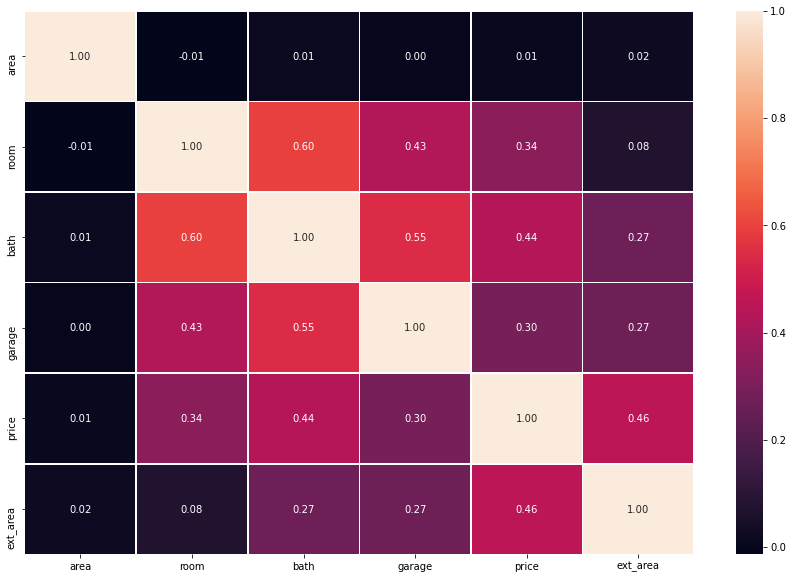

In [48]:
# Analysing correlation between variables 
big_corr = (df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data = big_corr, linewidths=.5, annot=True,  fmt=".2f")
plt.show()

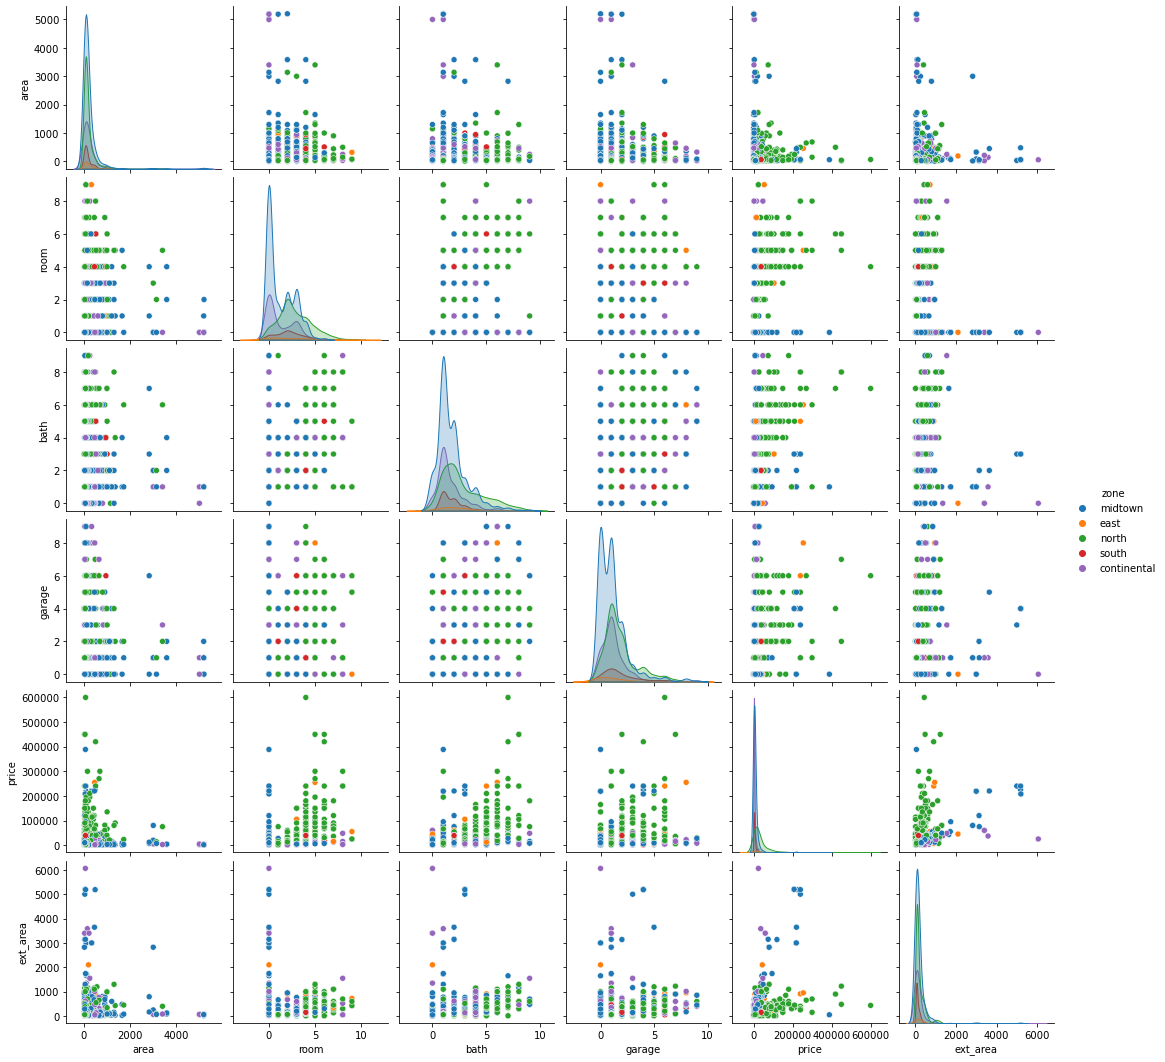

In [49]:
# Analysing distribution between variables
sns.pairplot(df, hue='zone')

In [50]:
# Checking DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2267
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      2147 non-null   int64 
 1   room      2147 non-null   int64 
 2   bath      2147 non-null   int64 
 3   garage    2147 non-null   int64 
 4   price     2147 non-null   int64 
 5   ext_area  2147 non-null   int64 
 6   property  2147 non-null   object
 7   zone      2147 non-null   object
dtypes: int64(6), object(2)
memory usage: 151.0+ KB


In [51]:
# Exporting DF to local machine
df.to_csv('df_trt.csv', sep=';')